### Import

In [2]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
from timeit import default_timer as time
from scipy.interpolate import griddata
from scipy import interpolate, signal
import pickle as pickle
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

### Observed Grid and Data

In [3]:
with open('synthetic_regular_tf.pickle', 'rb') as r:
    synthetic_regular_tf = pickle.load(r)

with open('synthetic_irregular_20_tf.pickle', 'rb') as r:
    synthetic_irregular_20_tf = pickle.load(r)

with open('synthetic_irregular_30_tf.pickle', 'rb') as r:
    synthetic_irregular_30_tf = pickle.load(r)

with open('synthetic_irregular_z05_tf.pickle', 'rb') as r:
    synthetic_irregular_z05_tf = pickle.load(r)

with open('synthetic_irregular_z10_tf.pickle', 'rb') as r:
    synthetic_irregular_z10_tf = pickle.load(r)

In [4]:
xi_plot = synthetic_regular_tf['x']
yi_plot = synthetic_regular_tf['y']
zi = synthetic_regular_tf['z']
tf = synthetic_regular_tf['tf']
shape = (100, 50)
N = shape[0]*shape[1]

In [5]:
print (1)
print (np.mean(np.abs(synthetic_regular_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_regular_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_regular_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf_fourier_up'])))
print()
print(2)
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf_fourier_up'])))
print()
print(3)
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf_fourier_up'])))
print()
print(4)
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf_fourier_up'])))
print()
print(5)
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf_fourier_up'])))

1
0.8955215802059913
1.4476279834067804

1.1671543252826782
1.8003616273655179

4.121860121778267
5.563529042926263

2
0.8981147027433614
1.395525615906605

1.4428956244791167
1.938738777728593

4.127495308712788
5.518901466645429

3
0.8824443868627859
1.3571963784140846

1.6103483260917915
1.9886120788487862

4.159544945291702
5.488692387089588

4
0.8255409073282303
1.4403153023895943

2.797451502987003
2.292440947458792

4.135520337375472
5.567309784821193

5
0.8033742979719553
1.4650095734819348

4.348563208043328
3.0410441646782083

4.136158752406209
5.563262722684889


In [6]:
scale_max = np.max(synthetic_irregular_z10_tf['delta_tf_fourier_up'])
scale_min = np.min(synthetic_irregular_z10_tf['delta_tf_fourier_up'])
print (scale_min, scale_max)
scale_max = 28.
scale_min = -33.

-32.89386710932051 27.682180494687145


### Plot of the Figure 3 synthetic data

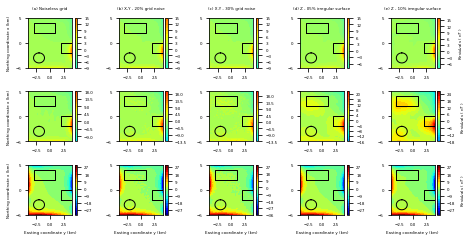

In [7]:
#Projection_model 
R = 1000 #Radius
xc, yc, zc = -3000.,-2000.,2000. #Center of sphere
phi = np.linspace(0, 2.*np.pi, 36)  #36 points
x = xc/1000 + R/1000*np.cos(phi)
y = yc/1000 + R/1000*np.sin(phi)

x_p = [-3., -3, 1, 1, -3.]
y_p = [2., 4, 4, 2, 2.]

x_p2 = [2, 2, 6, 6, 2]
y_p2 = [-2, 0, 0, -2, -2.]

height= 13.
width = 25.
height_per_width = height/width
fig = plt.figure(figsize=(6.66,6.66*height_per_width))
fig.patch.set_facecolor('xkcd:white')

plt.subplot(351)
plt.title('(a) Noiseless grid', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(356)
#plt.title('(b)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,11)
#plt.title('(c)', y=0.91, x=-0.16, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(352)
plt.title('(b) X,Y - 20% grid noise', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(357)
#plt.title('(e)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,12)
#plt.title('(f)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(353)
plt.title('(c) X,Y - 30% grid noise', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(358)
#plt.title('(h)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,13)
#plt.title('(i)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,4)
plt.title('(d) Z - 05% irregular surface', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,9)
#plt.title('(k)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,14)
#plt.title('(l)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,5)
plt.title('(e) Z - 10% irregular surface', y=1.05, x=0.5, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,10)
#plt.title('(n)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
#plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.subplot(3,5,15)
#plt.title('(o)', y=0.91, x=-0.15, fontsize=4)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=1)
plt.plot(x_p2,y_p2,color="k", linewidth=1)
plt.plot(y, x, color="k", linewidth=1)
cb = plt.colorbar(shrink=1)
cb.ax.tick_params(labelsize=4)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=4)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.xlabel('Easting coordinate y (km)', fontsize=4)
#plt.ylabel('Northing coordinate x (km)', fontsize=4)

plt.tight_layout()
plt.savefig('figures/Figure 6.png', dpi=600)